# **RANDOM FOREST**

**Random Forest algorithm is a powerful tree learning technique in Machine Learning.**

**It works by creating a number of Decision Trees during the training phase.**

**Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. **

**And each decision tree have a decision and you choose the majority one.**

# **Classification**-[link text](https://)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df =sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.drop(["class","embarked","alive"],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


In [ ]:
df.drop("deck",axis=1,inplace=True)

In [ ]:
df.dropna(subset=["embark_town"],inplace=True)

<Axes: >

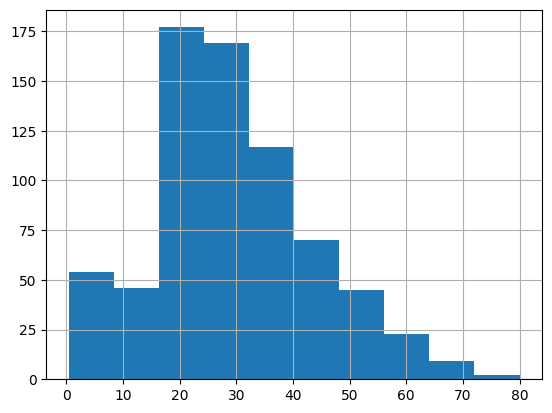

In [ ]:
df["age"].hist()

In [ ]:
df["age"].fillna(df["age"].median(),inplace=True)

/tmp/ipython-input-2039613669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(),inplace=True)


In [ ]:
df["age"].fillna(df["age"].median(),inplace=True)

/tmp/ipython-input-2039613669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(),inplace=True)


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


In [ ]:
print(df["embark_town"].unique())


['Southampton' 'Cherbourg' 'Queenstown']


In [ ]:
df["embark_town"].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [ ]:
df.duplicated().sum()

np.int64(116)

In [ ]:
df.shape

(889, 11)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(773, 11)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     773 non-null    int64  
 1   pclass       773 non-null    int64  
 2   sex          773 non-null    object 
 3   age          773 non-null    float64
 4   sibsp        773 non-null    int64  
 5   parch        773 non-null    int64  
 6   fare         773 non-null    float64
 7   who          773 non-null    object 
 8   adult_male   773 non-null    bool   
 9   embark_town  773 non-null    object 
 10  alone        773 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 61.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


df['who'] = le.fit_transform(df['who'])
df['adult_male']=le.fit_transform(df['adult_male'])
df['alone']=le.fit_transform(df['alone'])
df['embark_town']=le.fit_transform(df['embark_town'])

In [ ]:
df["sex"].isnull().sum()

np.int64(0)

In [ ]:
dummies=pd.get_dummies(df["sex"]).astype(int)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
887,1,0
888,1,0
889,0,1


In [ ]:
df=pd.concat([df,dummies],axis="columns")
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,female,male
0,0,3,male,22.0,1,0,7.2500,1,1,2,0,0,1
1,1,1,female,38.0,1,0,71.2833,2,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,2,0,2,1,1,0
3,1,1,female,35.0,1,0,53.1000,2,0,2,0,1,0
4,0,3,male,35.0,0,0,8.0500,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,2,0,1,0,1,0
887,1,1,female,19.0,0,0,30.0000,2,0,2,1,1,0
888,0,3,female,28.0,1,2,23.4500,2,0,2,0,1,0
889,1,1,male,26.0,0,0,30.0000,1,1,0,1,0,1


In [ ]:
df.drop(["sex"],axis="columns",inplace=True)

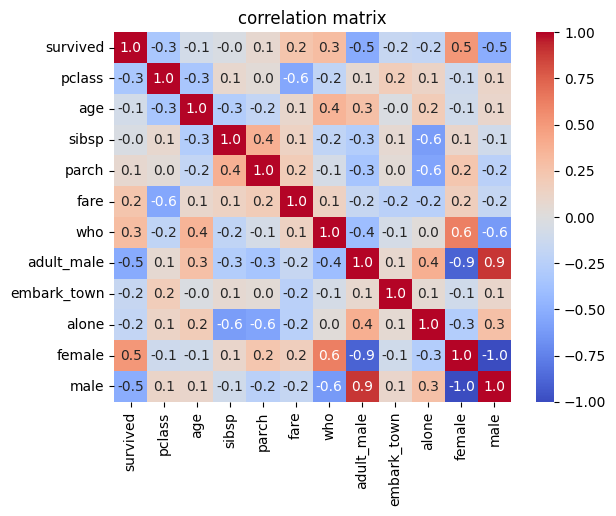

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True, fmt="0.01f",cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

In [ ]:
df.drop(["male","female"],axis=1,inplace=True)

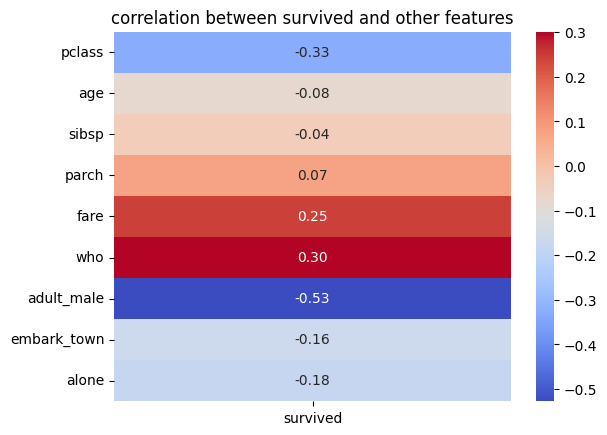

In [ ]:
survived_corr = df.corr()["survived"]
survived_corr =survived_corr.drop("survived")
sns.heatmap(survived_corr.to_frame(),annot=True,fmt=".2f",cmap="coolwarm",
            cbar=True,annot_kws={"size":10 })
plt.title("correlation between survived and other features")
plt.show()

In [ ]:
df.drop(["age","sibsp","parch"],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier




X = df[['pclass', 'fare', 'embark_town',"pclass","who","adult_male","alone"]]
y = df['survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




model =RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.79


In [ ]:
model.predict(X_test.head())

array([1, 1, 0, 0, 1])

In [ ]:

y_test.head()


,survived
399,1
777,1
583,0
180,0
835,1


In [ ]:
y_true=y_test
y_prdt=model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_prdt)
cm


array([[91, 13],
       [27, 63]])

<Axes: >

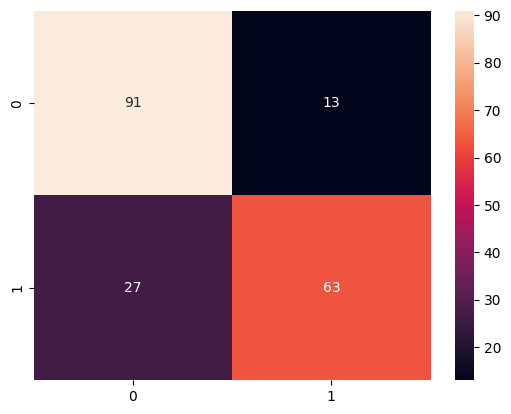

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True)
